**Аналитика в авиакомпании.** <br>



**Описание проекта**<br/>
Необходимо на основании данных, в которых содержится информация о:<br/>
model — модели самолета<br/>
flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года<br/>

И данных, в которых  содержится информация о:<br/>
city — городах<br/>
average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года<br/>
Сделать следующие работы:<br/>
выбрать топ-10 городов по количеству рейсов;<br/>
построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;<br/>
сделать выводы по каждому из графиков, пояснить результат.<br/>

Описание данных<br/>
База данных об авиаперевозках:<br/>
Таблица airports — информация об аэропортах:<br/>
airport_code — трёхбуквенный код аэропорта<br/>
airport_name — название аэропорта<br/>
city — город<br/>
timezone — временная зона<br/>
Таблица aircrafts — информация о самолётах:<br/>
aircraft_code — код модели самолёта<br/>
model — модель самолёта<br/>
range — количество самолётов<br/>
Таблица tickets — информация о билетах:<br/>
ticket_no — уникальный номер билета<br/>
passenger_id — персональный идентификатор пассажира<br/>
passenger_name — имя и фамилия пассажира<br/>
Таблица flights — информация о рейсах:<br/>
flight_id — уникальный идентификатор рейса<br/>
departure_airport — аэропорт вылета<br/>
departure_time — дата и время вылета<br/>
arrival_airport — аэропорт прилёта<br/>
arrival_time — дата и время прилёта<br/>
aircraft_code – id самолёта<br/>
Таблица ticket_flights — стыковая таблица «рейсы-билеты»<br/>
ticket_no — номер билета<br/>
flight_id — идентификатор рейса<br/>
Таблица festivals — информация о фестивалях<br/>
festival_id — уникальный номер фестиваля<br/>
festival_date — дата проведения фестиваля<br/>
festival_city — город проведения фестиваля<br/>
festival_name — название фестиваля

<a name="contents"></a><br/>
<a name="chapter_0"></a>    
**Содержание**<br/>
[**1. Изучение данных из представленного файла данных**](#chapter_1.)<br/>
[1.1. Выставление окружения и импорт библиотек.](#chapter_1.1.)<br/> 
[1.2. Импортируем основной файл данных локально и применяем кострукцию except для тренажера.](#chapter_1.2.)<br/>
[1.3. Описание данных, начальное.](#chapter_1.3.)<br/>
[1.4. Краткие выводы по структуре датасета.](#chapter_1.4.)<br/>

[**2. Изучение данных конкретных столбцов и предобработка данных**](#chapter_2.)<br/>
[2.1. Таблица query_3_data.](#chapter_2.1.)<br/>

    
[**3. Исследовательский анализ данных.**](#chapter_3.)    
[3.1. Исследование данных по самолетам.](#chapter_3.1.)<br/>
[3.2. Исследование городов по количеству рейсов.](#chapter_3.2.)<br/> 

[**4. Выводы**](#chapter_4.) 

<a name="chapter_1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1. Изучение данных из представленного файла данных.</b> <br/>
</div>


<a name="chapter_1.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1.1. Выставление окружения и импорт библиотек.</b> <br/>
</div>

1.1.1. Вначале посмотрим окружение тренажера Яндекс.Практикума с помощью команды ` !conda list -e ` и получаем такой результат по необходимым нам библиотекам:

1.1.2. Смотрим окружение на своей локальной машине:

In [1]:
#!conda list -e

1.1.3. Делаем импорт библиотек, используемых в курсе, и сделаем запрос на обновление основной библиотеки.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random

import numpy as np

import math as mt
from math import factorial

import scipy.stats
from scipy.stats import norm
from scipy import stats as st

import seaborn as sns                 # подождем пока, лучше позже, потому как при меняется вид обычных гистограмм
sns.set(color_codes=True)

import copy #импорт библиотеки по копированию Источник: https://pythononline.ru/osnovy/modul-copy-python

import requests  # Импорт библиотеки для запросов к серверу
from bs4 import BeautifulSoup  # Импорт библиотеки для автоматического парсинга странички

import re

#import warnings                       # предупреждения пока будем оставлять
#warnings.filterwarnings("ignore")



In [3]:
#!pip install pandas -U

#!conda list pandas
#!pip install pandas==1.2.4 # инсталлировал версию 1.2.4 С версией 1.3.3 - не совсем правильно рисовалась легенда графиков
!conda list pandas

# packages in environment at C:\Users\Lusi\anaconda3:
#
# Name                    Version                   Build  Channel
pandas                    1.3.3                    pypi_0    pypi


1.1.4. Корректируем вывод табличных данных с помощью функции set_option() в Pandas

In [4]:
#pd.set_option('max_rows', 5) # поставим ограничение на вывод 5 строк https://habr.com/ru/post/521894/
pd.set_option('display.max_columns', None) # снимаем ограничение на отображение колонок
pd.set_option('display.float_format', '{:.2f}'.format) # ставим ограничение на количество выводимых знаков у float 


<a name="chapter_1.2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1.2. Импортируем основной файл данных локально и применяем кострукцию except для тренажера.</b> <br/>
</div>

In [5]:
try:
    query_1_data = pd.read_csv('C:/1_Webartel/2021/pithon_work/datasets/query_1.csv') # разделители у нас запятые, можно не применять sep='\t'
except FileNotFoundError as e:                                      
    query_1_data = pd.read_csv('/datasets/query_1.csv')
    
try:
    query_3_data = pd.read_csv('C:/1_Webartel/2021/pithon_work/datasets/query_3.csv') # разделители у нас запятые, можно не применять sep='\t'
except FileNotFoundError as e:                                      
    query_3_data = pd.read_csv('/datasets/query_3.csv')



1.2.1.Отсмотрим последовательно эти датасеты

In [6]:
query_1_data.head(5)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [7]:
query_3_data.head(5)

,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45


In [8]:
for data in [query_1_data, query_3_data]: print(data.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None



In [9]:
for data in [query_1_data, query_3_data]: 
    missing_values = data.isnull().sum()
    display(missing_values)


model             0
flights_amount    0
dtype: int64

city               0
average_flights    0
dtype: int64

In [10]:
for data in [query_1_data, query_3_data]: 
    display(data.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
model,8,8,Airbus A319-100,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flights_amount,8.00,NaN,NaN,NaN,2035.62,1965.20,300.00,605.25,795.00,4250.25,4557.00


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
city,101,101,Абакан,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_flights,101.00,NaN,NaN,NaN,5.49,13.12,1.00,2.00,3.00,5.87,129.77


 <a name="chapter_1.3."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1.3. Описание данных, начальное.</b> <br/>
</div>

/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:
model — модели самолета <br/>
flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года<br/><br/>

/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:<br/>
city — городах<br/>
average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

<a name="chapter_1.4."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>1.4. Краткие выводы по структуре​ датасета.</b> <br/>
</div>

- Пропусков нет, данные массивов вполне корректные.<br/>

- Типы данных тоже вполне нормальные object, int64 и float64. На такого размера таблицах нет смысла за уменьшение объема памяти.
   

<a name="chapter_2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2. Изучение данных конкретных столбцов и предобработка данных.</b> <br/>
</div>

<a name="chapter_2.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>2.1. Таблица query_3_data.</b> <br/>
</div>

Дополнительное изучение тоже ни к чему особому не привело, существующие данные особо менять не надо. Но давайте переведем названия городов в строчные символы и обработаем на случай лишних пробелов. 

In [11]:
query_3_data['city'] = query_3_data['city'].str.lower()
display(query_3_data)

,city,average_flights
0,абакан,3.87
1,анадырь,1.00
2,анапа,2.16
3,архангельск,5.35
4,астрахань,2.45
...,...,...
96,чита,1.58
97,элиста,4.87
98,южно-сахалинск,4.29
99,якутск,2.74


In [12]:
query_3_data['city'] = query_3_data['city'].str.replace('^ +| +$', '', regex=True) # Заменить пробел на обоих концах : через регулярное выражение
query_3_data['city'] = query_3_data['city'].str.replace('  ', '', regex=True) # заменить два пробела
query_3_data['city'].describe() # и тут же проверим - были ли лишние пробелы

count        101
unique       101
top       абакан
freq           1
Name: city, dtype: object

Ничего не изменилось, но небольшая перестраховка не помешает ))

<a name="chapter_3."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3. Исследовательский анализ данных.</b> <br/>
</div>

В задании указано так: <br/>
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

<a name="chapter_3.1."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.1. Исследование данных по самолетам.</b> <br/>
</div>

Посмотрим самолеты и помним, что данные за сентябрь 2018.

In [13]:
all_model = query_1_data.sort_values(by='flights_amount', ascending=False)
display(all_model.head(10))

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


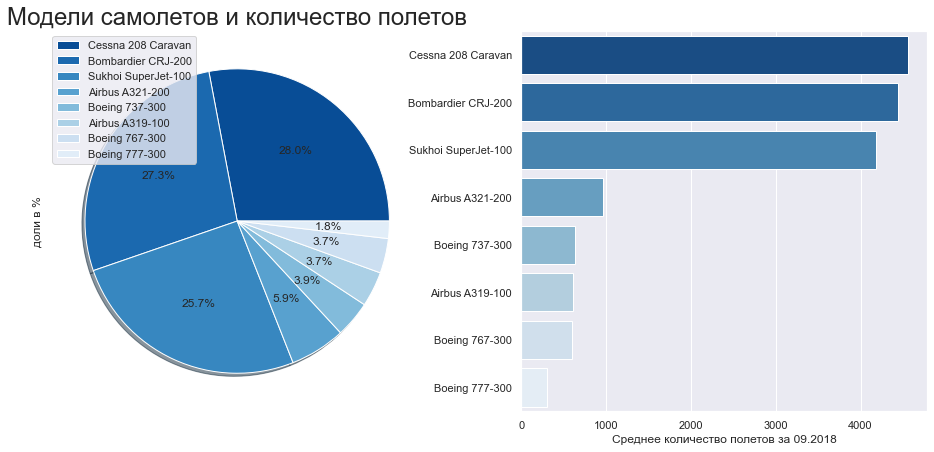

In [14]:
all_model = query_1_data.pivot_table(index='model', values='flights_amount', aggfunc='sum'
                                        ).sort_values('flights_amount', ascending=False).head(10)

fig, ax = plt.subplots(1, 2, figsize=(16, 7))

silent_labels = [' '] * len(all_model.values)
    
    
cmap = sns.color_palette('Blues_r', len(all_model))
    
all_model.plot.pie(shadow=True, autopct='%1.1f%%', \
              labels=silent_labels, ax=ax[0], colors=cmap, subplots=True)
ax[0].legend(loc=2, labels=all_model.index)
ax[0].set_title('Модели самолетов и количество полетов', fontsize=24)
ax[0].set_ylabel('доли в %')
    
sns.barplot(y=all_model.index, x='flights_amount', data=all_model, estimator=sum, orient='h', ax=ax[1], palette=cmap)
ax[1].set_ylabel(' ')
ax[1].set_xlabel('Среднее количество полетов за 09.2018')
    
plt.show()

Лидер - Cessna 208 Caravan, довольно старый самолет, сертификация для полетов с 1984 года, до 13 мест. https://ru.wikipedia.org/wiki/Cessna_208<br/>  Bombardier CRJ-200, тоже  старый самолет, сертификация с 1995 года, до 50 мест. https://ru.wikipedia.org/wiki/Bombardier_CRJ200<br/>Sukhoi SuperJet-100 сертифицирован для эксплуатации с 2011 года, до 108 пассажиров. https://avia.pro/blog/superdzhet-100<br/>
Airbus A321-200, сертифицирован для эксплуатации с 1996 года, до 220 пассажиров. https://avia.pro/blog/airbus-a321-eyrbas-a321<br/>
Boeing 737-300, сертифицирован для эксплуатации с 1984 года, до 149 пассажиров.https://avia.pro/blog/boeing-737-300-foto-video-shema-salona-harakteristiki-otzyvy<br/>
Airbus A319-100, сертифицирован для эксплуатации с 1996 года, базовая модель до 124 пассажиров. https://avia.pro/blog/airbus-a319<br/>
Boeing 767-300, сертифицирован для эксплуатации с 1986 года, базовая модель до 269 пассажиров. https://avia.pro/blog/boeing-767-300 <br/>
Boeing 777-300, сертифицирован для эксплуатации с 1998 года, базовая модель до 479 пассажиров. https://avia.pro/blog/boeing-777-300 <br/>
Ручную работу по поиску основных характеристик самолетов провели, что нам мешает прикинуть пассажиропоток и посчитать сколько примерно пассажиров они бы подняли в воздух за сентябрь 2018 года при 100% загрузке?

Сделаем еще один столбец на основе наших полученных новых данных.

In [15]:
all_model['aircraft_capacity'] = [13, 50, 108, 220, 149, 124, 269, 479]
display(all_model)

,flights_amount,aircraft_capacity
model,,
Cessna 208 Caravan,4557,13
Bombardier CRJ-200,4446,50
Sukhoi SuperJet-100,4185,108
Airbus A321-200,960,220
Boeing 737-300,630,149
Airbus A319-100,607,124
Boeing 767-300,600,269
Boeing 777-300,300,479


In [16]:
all_model['passenger_traffic'] = all_model['flights_amount'] * all_model['aircraft_capacity']
display(all_model)

,flights_amount,aircraft_capacity,passenger_traffic
model,,,
Cessna 208 Caravan,4557,13,59241
Bombardier CRJ-200,4446,50,222300
Sukhoi SuperJet-100,4185,108,451980
Airbus A321-200,960,220,211200
Boeing 737-300,630,149,93870
Airbus A319-100,607,124,75268
Boeing 767-300,600,269,161400
Boeing 777-300,300,479,143700


In [17]:
all_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Cessna 208 Caravan to Boeing 777-300
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   flights_amount     8 non-null      int64
 1   aircraft_capacity  8 non-null      int64
 2   passenger_traffic  8 non-null      int64
dtypes: int64(3)
memory usage: 556.0+ bytes


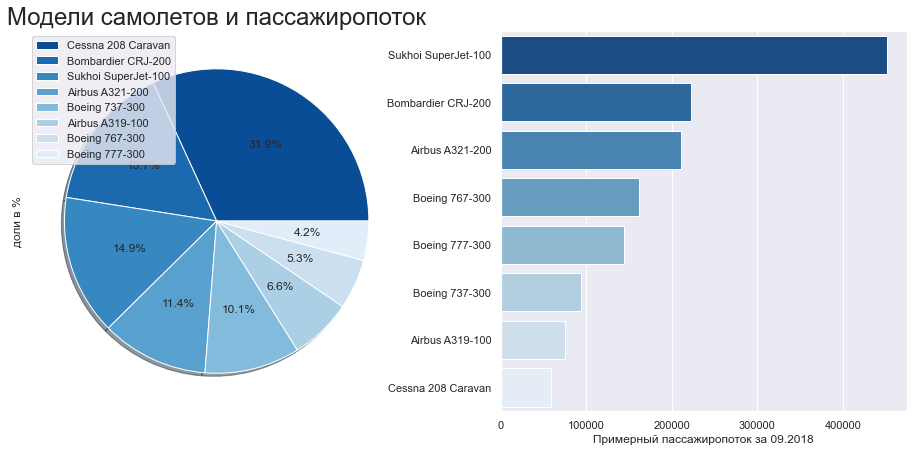

In [18]:
all_model_2 = all_model.pivot_table(index='model', values='passenger_traffic', aggfunc='sum'
                                        ).sort_values('passenger_traffic', ascending=False).head(10)

fig, ax = plt.subplots(1, 2, figsize=(16, 7))

silent_labels = [' '] * len(all_model_2.values)
    
    
cmap = sns.color_palette('Blues_r', len(all_model_2))
    
all_model_2.plot.pie(shadow=True, autopct='%1.1f%%', \
              labels=silent_labels, ax=ax[0], colors=cmap, subplots=True)
ax[0].legend(loc=2, labels=all_model.index)
ax[0].set_title('Модели самолетов и пассажиропоток', fontsize=24)
ax[0].set_ylabel('доли в %')
    
sns.barplot(y=all_model_2.index, x='passenger_traffic', data=all_model_2, estimator=sum, orient='h', ax=ax[1], palette=cmap)
ax[1].set_ylabel(' ')
ax[1].set_xlabel('Примерный пассажиропоток за 09.2018')
    
plt.show()


Маленькие самолеты имеет гораздо большее количество полетов. Получается, что малая авиация до сих пор не умерла и работает по коротким маршрутам. Время полета там низкое, потому и количество рейсов большое. Интересно, насколько различается рентабельность полетов больших и малых самолетов. Но этих данных у нас нет.

Да, малые самолеты очень должны быть востребованы и во время отпусков, как подбрасывающие пассажиров, летящих в отпуск, до крупных городов с крупными аэропортами, являющимися транспортными узлами.

И интересно, что лидером по пассажиропотоку является самолет российского производства Sukhoi SuperJet-100 с примерной цифрой в 452 тыс. пассажиров за сентябрь 2018 года и это доля в 31,9% на рынке авиапассажироперевозок.

А два самых маленьких самолета по вместимости пассажирских салонов Cessna 208 Caravan и Bombardier CRJ-200 - по количеству полетов владеют совокупной долей в количестве полетов в 47,6%

<a name="chapter_3.2."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>3.2. Исследование городов по количеству рейсов.</b> <br/>
</div>

Выберем топ-10 городов по количеству рейсов:

In [19]:
city_top10 = query_3_data.sort_values(by='average_flights', ascending=False)
display(city_top10.head(10))

,city,average_flights
43,москва,129.77
70,санкт-петербург,31.16
54,новосибирск,17.32
33,красноярск,11.58
20,екатеринбург,11.32
67,ростов-на-дону,10.19
63,пермь,10.13
10,брянск,10.00
74,сочи,9.61
84,ульяновск,9.58


In [20]:
city_top10 = query_3_data.sort_values(by='average_flights', ascending=True)
display(city_top10.head(10))

,city,average_flights
8,благовещенск,1.00
1,анадырь,1.00
31,комсомольск-на-амуре,1.00
76,стрежевой,1.00
49,нефтеюганск,1.00
65,петропавловск-камчатский,1.00
88,усть-кут,1.00
22,ижевск,1.00
9,братск,1.00
21,иваново,1.00


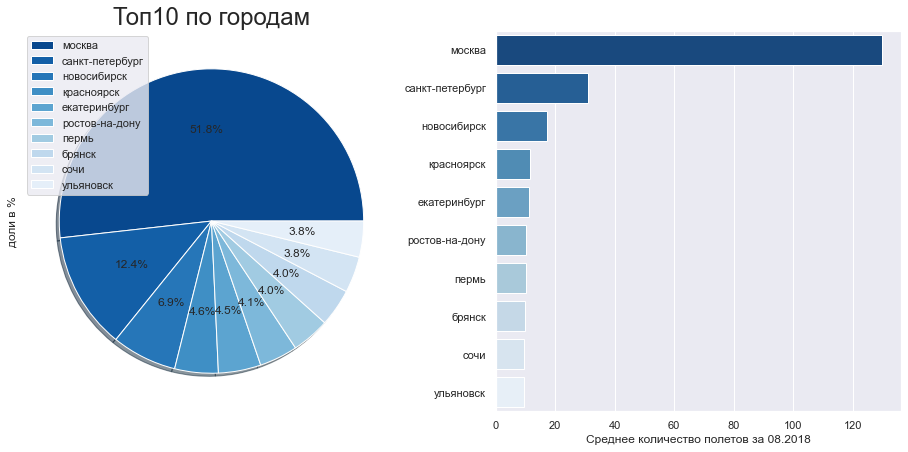

In [21]:
city_top10 = query_3_data.pivot_table(index='city', values='average_flights', aggfunc='sum'
                                        ).sort_values('average_flights', ascending=False).head(10)

fig, ax = plt.subplots(1, 2, figsize=(16, 7))

silent_labels = [' '] * len(city_top10.values)
    
    
cmap = sns.color_palette('Blues_r', len(city_top10.values))
    
city_top10.plot.pie(shadow=True, autopct='%1.1f%%', \
              labels=silent_labels, ax=ax[0], colors=cmap, subplots=True)
ax[0].legend(loc=2, labels=city_top10.index)
ax[0].set_title('Топ10 по городам', fontsize=24)
ax[0].set_ylabel('доли в %')
    
sns.barplot(y=city_top10.index, x='average_flights', data=city_top10, estimator=sum, orient='h', ax=ax[1], palette=cmap)
ax[1].set_ylabel(' ')
ax[1].set_xlabel('Среднее количество полетов за 08.2018')
    
plt.show()                 

Помним, что это август 2018 года, интересно - Сочи попал в первую десятку в соответствии с населением, в нем проживающем,  или как курортный город. <br/>
Можем это выяснить, сравнив с населением данных городов. Заодно увидим, где расхождение с цифрами населения самое большое.

In [22]:
# Нашли такие данные по населению российских городов:
URL = 'https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8_%D1%81_%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC_%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5_100_%D1%82%D1%8B%D1%81%D1%8F%D1%87_%D0%B6%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%B9'
req = requests.get(URL)
soup=BeautifulSoup(req.text, 'lxml')

table = soup.find('table')

content=[] 
for row in table.find_all('tr'): 
    if not row.find_all('th'): 
            content.append([element.text for element in row.find_all('td')])
            
rus_city = pd.DataFrame(content) 
display(rus_city.head(10))
rus_city.info()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1\n,2,Москва[18],1039,2080,4609,6133,7194,8057,8878,10126,11504,11541,11613,11980,12108,12198,12330,12381,12506,12615,12678,12655,12632[19]\n
1,2\n,1,Санкт-Петербург,1265,1737,3431,3390,4033,4569,4989,4661,4880,4899,4953,5028,5132,5192,5226,5282,5352,5384,5398,5384,5377[19]\n
2,3\n,,Новосибирск,8,120,404,885,1161,1309,1420,1426,1474,1475,1499,1524,1548,1567,1584,1603,1613,1618,1626,1620,\n
3,4\n,35,Екатеринбург,43,140,423,779,1025,1210,1296,1294,1350,1353,1378,1396,1412,1428,1444,1456,1469,1483,1494,1495,1492[20]\n
4,5\n,4,Казань,130,179,406,667,869,989,1085,1105,1144,1145,1161,1176,1191,1206,1217,1232,1244,1252,1257,1257,\n
5,6\n,8,Нижний Новгород,90,222,644,941,1170,1342,1400,1311,1251,1252,1255,1260,1264,1268,1267,1262,1259,1254,1252,1244,\n
6,7\n,79,Челябинск,20,59,273,689,875,1030,1107,1077,1130,1131,1143,1156,1169,1183,1192,1199,1202,1201,1197,1188,1178[21]\n
7,8\n,40,Омск,37,162,289,581,821,1016,1149,1134,1154,1154,1157,1161,1166,1174,1178,1178,1172,1165,1155,1140,\n
8,9\n,5,Ростов-на-Дону,120,308,510,600,789,925,1008,1068,1089,1091,1097,1104,1110,1115,1120,1125,1130,1133,1138,1138,\n
9,10\n,9,Самара,90,176,390,806,1027,1192,1222,1158,1165,1167,1169,1172,1172,1172,1171,1170,1163,1157,1157,1145,1136[22]\n


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       171 non-null    object
 1   1       171 non-null    object
 2   2       171 non-null    object
 3   3       171 non-null    object
 4   4       171 non-null    object
 5   5       171 non-null    object
 6   6       171 non-null    object
 7   7       171 non-null    object
 8   8       171 non-null    object
 9   9       171 non-null    object
 10  10      171 non-null    object
 11  11      171 non-null    object
 12  12      171 non-null    object
 13  13      171 non-null    object
 14  14      171 non-null    object
 15  15      171 non-null    object
 16  16      171 non-null    object
 17  17      171 non-null    object
 18  18      171 non-null    object
 19  19      171 non-null    object
 20  20      171 non-null    object
 21  21      171 non-null    object
 22  22      171 non-null    ob

Нам нужны столбцы 2 и 19. И сильно смущают пропуски в таблице типа '—' данные по городу типа 'Симферополь[Крым 1][19'. И надо бы численные данные перевести в int32 и помним, что это данные в тыс. человек.

Попробуем '—' перевести в -1, как метку. Также уберем все мешающие символы, типа '[Крым 1][19' и подобных [18]. Также переведем названия городов в строчные символы. И заключение уберем возможные лишние пробелы в названии городов.

In [23]:
rus_city[2] = rus_city[2].replace('Москва[18]', 'Москва')
rus_city[2] = rus_city[2].replace('Балашиха[20]', 'Балашиха')
rus_city[2] = rus_city[2].replace('Подольск[21]', 'Подольск')
rus_city[2] = rus_city[2].replace('Королёв[22]', 'Королёв')
#[Крым 1][19] [20]
rus_city[2] = rus_city[2].replace('Севастополь[Крым 1][19]', 'Севастополь')
rus_city[2] = rus_city[2].replace('Симферополь[Крым 1][19]', 'Симферополь')
rus_city[2] = rus_city[2].replace('Керчь[Крым 1][19]', 'Керчь')
rus_city[2] = rus_city[2].replace('Евпатория[Крым 1][19]', 'Евпатория')
rus_city[2] = rus_city[2].str.lower()

rus_city[2] = rus_city[2].str.replace('^ +| +$', '', regex=True) # Заменить пробел на обоих концах : через регулярное выражение
rus_city[2] = rus_city[2].str.replace('  ', '', regex=True) # заменить два пробела

display(rus_city.head(10))
rus_city.info()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1\n,2,москва,1039,2080,4609,6133,7194,8057,8878,10126,11504,11541,11613,11980,12108,12198,12330,12381,12506,12615,12678,12655,12632[19]\n
1,2\n,1,санкт-петербург,1265,1737,3431,3390,4033,4569,4989,4661,4880,4899,4953,5028,5132,5192,5226,5282,5352,5384,5398,5384,5377[19]\n
2,3\n,,новосибирск,8,120,404,885,1161,1309,1420,1426,1474,1475,1499,1524,1548,1567,1584,1603,1613,1618,1626,1620,\n
3,4\n,35,екатеринбург,43,140,423,779,1025,1210,1296,1294,1350,1353,1378,1396,1412,1428,1444,1456,1469,1483,1494,1495,1492[20]\n
4,5\n,4,казань,130,179,406,667,869,989,1085,1105,1144,1145,1161,1176,1191,1206,1217,1232,1244,1252,1257,1257,\n
5,6\n,8,нижний новгород,90,222,644,941,1170,1342,1400,1311,1251,1252,1255,1260,1264,1268,1267,1262,1259,1254,1252,1244,\n
6,7\n,79,челябинск,20,59,273,689,875,1030,1107,1077,1130,1131,1143,1156,1169,1183,1192,1199,1202,1201,1197,1188,1178[21]\n
7,8\n,40,омск,37,162,289,581,821,1016,1149,1134,1154,1154,1157,1161,1166,1174,1178,1178,1172,1165,1155,1140,\n
8,9\n,5,ростов-на-дону,120,308,510,600,789,925,1008,1068,1089,1091,1097,1104,1110,1115,1120,1125,1130,1133,1138,1138,\n
9,10\n,9,самара,90,176,390,806,1027,1192,1222,1158,1165,1167,1169,1172,1172,1172,1171,1170,1163,1157,1157,1145,1136[22]\n


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       171 non-null    object
 1   1       171 non-null    object
 2   2       171 non-null    object
 3   3       171 non-null    object
 4   4       171 non-null    object
 5   5       171 non-null    object
 6   6       171 non-null    object
 7   7       171 non-null    object
 8   8       171 non-null    object
 9   9       171 non-null    object
 10  10      171 non-null    object
 11  11      171 non-null    object
 12  12      171 non-null    object
 13  13      171 non-null    object
 14  14      171 non-null    object
 15  15      171 non-null    object
 16  16      171 non-null    object
 17  17      171 non-null    object
 18  18      171 non-null    object
 19  19      171 non-null    object
 20  20      171 non-null    object
 21  21      171 non-null    object
 22  22      171 non-null    ob

In [24]:
rus_city.columns

RangeIndex(start=0, stop=24, step=1)

И в процессе увидел, что там есть данные типа '0,6' и '0,4' - пожертвуем ими, заменив на 0, учитывая, что они образовались только в период образования города и к 208 году отношения не имеют.

In [25]:
for data in [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]:
    rus_city[data] = rus_city[data].replace('—', '-1')
    rus_city[data] = rus_city[data].replace('…', '-1')
    rus_city[data] = rus_city[data].replace('—\n', '-1')
    rus_city[data] = rus_city[data].replace('0,6', '0')
    rus_city[data] = rus_city[data].replace('0,4', '0')
display(rus_city.head(10))
rus_city.info()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1\n,2,москва,1039,2080,4609,6133,7194,8057,8878,10126,11504,11541,11613,11980,12108,12198,12330,12381,12506,12615,12678,12655,12632[19]\n
1,2\n,1,санкт-петербург,1265,1737,3431,3390,4033,4569,4989,4661,4880,4899,4953,5028,5132,5192,5226,5282,5352,5384,5398,5384,5377[19]\n
2,3\n,,новосибирск,8,120,404,885,1161,1309,1420,1426,1474,1475,1499,1524,1548,1567,1584,1603,1613,1618,1626,1620,\n
3,4\n,35,екатеринбург,43,140,423,779,1025,1210,1296,1294,1350,1353,1378,1396,1412,1428,1444,1456,1469,1483,1494,1495,1492[20]\n
4,5\n,4,казань,130,179,406,667,869,989,1085,1105,1144,1145,1161,1176,1191,1206,1217,1232,1244,1252,1257,1257,\n
5,6\n,8,нижний новгород,90,222,644,941,1170,1342,1400,1311,1251,1252,1255,1260,1264,1268,1267,1262,1259,1254,1252,1244,\n
6,7\n,79,челябинск,20,59,273,689,875,1030,1107,1077,1130,1131,1143,1156,1169,1183,1192,1199,1202,1201,1197,1188,1178[21]\n
7,8\n,40,омск,37,162,289,581,821,1016,1149,1134,1154,1154,1157,1161,1166,1174,1178,1178,1172,1165,1155,1140,\n
8,9\n,5,ростов-на-дону,120,308,510,600,789,925,1008,1068,1089,1091,1097,1104,1110,1115,1120,1125,1130,1133,1138,1138,\n
9,10\n,9,самара,90,176,390,806,1027,1192,1222,1158,1165,1167,1169,1172,1172,1172,1171,1170,1163,1157,1157,1145,1136[22]\n


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       171 non-null    object
 1   1       171 non-null    object
 2   2       171 non-null    object
 3   3       171 non-null    object
 4   4       171 non-null    object
 5   5       171 non-null    object
 6   6       171 non-null    object
 7   7       171 non-null    object
 8   8       171 non-null    object
 9   9       171 non-null    object
 10  10      171 non-null    object
 11  11      171 non-null    object
 12  12      171 non-null    object
 13  13      171 non-null    object
 14  14      171 non-null    object
 15  15      171 non-null    object
 16  16      171 non-null    object
 17  17      171 non-null    object
 18  18      171 non-null    object
 19  19      171 non-null    object
 20  20      171 non-null    object
 21  21      171 non-null    object
 22  22      171 non-null    ob

Заметим, что с 22 столбцом не справились, надо бы регулярным выражением убрать. Но этот столбец нам пока и не нужен. Поэтому не будем пока делать эту задачу.

In [26]:
for data in [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]:
    rus_city[data] = rus_city[data].astype('int64')
    
display(rus_city.head(5))
#Не знаю как, но изменение типа на int64 вместо ранее запланированного int32
#правильно отработало и на данных типа 12655\n
#int32 так не смог сделать
# надо бы потом поискать объяснение данного факта

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1\n,2,москва,1039,2080,4609,6133,7194,8057,8878,10126,11504,11541,11613,11980,12108,12198,12330,12381,12506,12615,12678,12655,12632[19]\n
1,2\n,1,санкт-петербург,1265,1737,3431,3390,4033,4569,4989,4661,4880,4899,4953,5028,5132,5192,5226,5282,5352,5384,5398,5384,5377[19]\n
2,3\n,,новосибирск,8,120,404,885,1161,1309,1420,1426,1474,1475,1499,1524,1548,1567,1584,1603,1613,1618,1626,1620,\n
3,4\n,35,екатеринбург,43,140,423,779,1025,1210,1296,1294,1350,1353,1378,1396,1412,1428,1444,1456,1469,1483,1494,1495,1492[20]\n
4,5\n,4,казань,130,179,406,667,869,989,1085,1105,1144,1145,1161,1176,1191,1206,1217,1232,1244,1252,1257,1257,\n


Ну раз все у нас получилось, то оставим только 2 и 19 столбцы

In [27]:
rus_city = rus_city[[2, 19]] # нас интересует название города и 2018 год
rus_city.columns = ['city', 'population_2018']

In [28]:
rus_city.sort_values(by='population_2018', ascending=False, inplace=True)
display(rus_city.head(5))

,city,population_2018
0,москва,12506
1,санкт-петербург,5352
2,новосибирск,1613
3,екатеринбург,1469
5,нижний новгород,1259


In [29]:
rus_city['city'].unique().tolist() # калининград\n - увидел только один артефакт

['москва',
 'санкт-петербург',
 'новосибирск',
 'екатеринбург',
 'нижний новгород',
 'казань',
 'челябинск',
 'омск',
 'самара',
 'ростов-на-дону',
 'уфа',
 'красноярск',
 'пермь',
 'воронеж',
 'волгоград',
 'краснодар',
 'саратов',
 'тюмень',
 'тольятти',
 'ижевск',
 'барнаул',
 'ульяновск',
 'иркутск',
 'хабаровск',
 'ярославль',
 'владивосток',
 'махачкала',
 'томск',
 'оренбург',
 'кемерово',
 'новокузнецк',
 'рязань',
 'астрахань',
 'набережные челны',
 'пенза',
 'липецк',
 'киров',
 'чебоксары',
 'тула',
 'калининград\n',
 'балашиха[27]',
 'курск',
 'севастополь[крым 1][26]',
 'улан-удэ',
 'ставрополь',
 'сочи',
 'тверь',
 'магнитогорск',
 'иваново',
 'брянск',
 'белгород',
 'сургут',
 'владимир',
 'нижний тагил',
 'архангельск',
 'чита',
 'симферополь[крым 1][26]',
 'калуга',
 'смоленск',
 'волжский',
 'саранск',
 'череповец',
 'курган',
 'орёл',
 'якутск',
 'вологда',
 'владикавказ',
 'подольск[33]',
 'грозный',
 'мурманск',
 'тамбов',
 'стерлитамак',
 'петрозаводск',
 'костром

Исправим калининград\n

In [30]:
rus_city['city'] = rus_city['city'].replace('калининград\n', 'калининград')
rus_city['city'].unique().tolist() # и сразу проверим

['москва',
 'санкт-петербург',
 'новосибирск',
 'екатеринбург',
 'нижний новгород',
 'казань',
 'челябинск',
 'омск',
 'самара',
 'ростов-на-дону',
 'уфа',
 'красноярск',
 'пермь',
 'воронеж',
 'волгоград',
 'краснодар',
 'саратов',
 'тюмень',
 'тольятти',
 'ижевск',
 'барнаул',
 'ульяновск',
 'иркутск',
 'хабаровск',
 'ярославль',
 'владивосток',
 'махачкала',
 'томск',
 'оренбург',
 'кемерово',
 'новокузнецк',
 'рязань',
 'астрахань',
 'набережные челны',
 'пенза',
 'липецк',
 'киров',
 'чебоксары',
 'тула',
 'калининград',
 'балашиха[27]',
 'курск',
 'севастополь[крым 1][26]',
 'улан-удэ',
 'ставрополь',
 'сочи',
 'тверь',
 'магнитогорск',
 'иваново',
 'брянск',
 'белгород',
 'сургут',
 'владимир',
 'нижний тагил',
 'архангельск',
 'чита',
 'симферополь[крым 1][26]',
 'калуга',
 'смоленск',
 'волжский',
 'саранск',
 'череповец',
 'курган',
 'орёл',
 'якутск',
 'вологда',
 'владикавказ',
 'подольск[33]',
 'грозный',
 'мурманск',
 'тамбов',
 'стерлитамак',
 'петрозаводск',
 'кострома'

In [31]:
rus_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 166
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   city             171 non-null    object
 1   population_2018  171 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


Соединим таблицы

In [32]:
city_all = query_3_data.merge(rus_city, left_on=['city'], right_on=['city'], how='left')
display(city_all.sort_values(by='population_2018', ascending=False).head(10))

,city,average_flights,population_2018
43,москва,129.77,12506.00
70,санкт-петербург,31.16,5352.00
54,новосибирск,17.32,1613.00
20,екатеринбург,11.32,1469.00
52,нижний новгород,5.87,1259.00
25,казань,7.74,1244.00
94,челябинск,6.71,1202.00
59,омск,3.29,1172.00
69,самара,3.00,1163.00
67,ростов-на-дону,10.19,1130.00


In [33]:
city_all = query_3_data.merge(rus_city, left_on=['city'], right_on=['city'], how='left')
display(city_all.sort_values(by='average_flights', ascending=False).head(10))

,city,average_flights,population_2018
43,москва,129.77,12506.00
70,санкт-петербург,31.16,5352.00
54,новосибирск,17.32,1613.00
33,красноярск,11.58,1091.00
20,екатеринбург,11.32,1469.00
67,ростов-на-дону,10.19,1130.00
63,пермь,10.13,1052.00
10,брянск,10.00,406.00
74,сочи,9.61,424.00
84,ульяновск,9.58,627.00


In [34]:
city_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
 2   population_2018  77 non-null     float64
dtypes: float64(2), object(1)
memory usage: 3.2+ KB


Интересно, из Википедии взяли 171 город, но не у всех городов из нашей первоначальной таблицы оказались совмещенными данные. Посмотрим, у каких городов не оказалось данных по населению?

In [35]:
city_all[pd.isnull(city_all['population_2018'])].sort_values(by='average_flights', ascending=False) # смотрим строки с NaN в столбце 

,city,average_flights,population_2018
73,советский,9.00,NaN
42,мирный,6.29,NaN
15,воркута,4.58,NaN
41,минеральные воды,3.42,NaN
30,когалым,3.16,NaN
90,ухта,3.00,NaN
11,бугульма,3.00,NaN
82,удачный,3.00,NaN
87,усть-илимск,2.87,NaN
47,нарьян-мар,2.61,NaN


In [36]:
len(city_all[pd.isnull(city_all['population_2018'])].sort_values(by='average_flights', ascending=True))

24

Какая-то ошибочка у нас с объединением двух таблиц произошла, 24 городов не хватает. <br/>
Это не с объединением. Просто некоторые города не превышают численность населения в 100 тыс. чел. и данных на них нет в этой таблице.<br/>
Посмотрим немного более подробно

In [37]:
city_all = query_3_data.merge(rus_city, left_on=['city'], right_on=['city'], how='left')
display(city_all.sort_values(by='population_2018', ascending=False).head(16))

,city,average_flights,population_2018
43,москва,129.77,12506.00
70,санкт-петербург,31.16,5352.00
54,новосибирск,17.32,1613.00
20,екатеринбург,11.32,1469.00
52,нижний новгород,5.87,1259.00
25,казань,7.74,1244.00
94,челябинск,6.71,1202.00
59,омск,3.29,1172.00
69,самара,3.00,1163.00
67,ростов-на-дону,10.19,1130.00


Также можно сказать, что такие крупные города, как Самара, Омск, Воронеж и Краснодар, например -  имеют какие-то низкие показатели, что есть странно и может говорить о достоверности данных. А может иметь и более какую-то глубокую причину. Требует дальнейших ислледований на датасетах более значимых размеров и иных периодов времени. Мы пока этим заморачиваться не будем.<br/>


In [38]:
city_all = query_3_data.merge(rus_city, left_on=['city'], right_on=['city'], how='left')
display(city_all.sort_values(by='average_flights', ascending=False).head(45))

,city,average_flights,population_2018
43,москва,129.77,12506.00
70,санкт-петербург,31.16,5352.00
54,новосибирск,17.32,1613.00
33,красноярск,11.58,1091.00
20,екатеринбург,11.32,1469.00
67,ростов-на-дону,10.19,1130.00
63,пермь,10.13,1052.00
10,брянск,10.00,406.00
74,сочи,9.61,424.00
84,ульяновск,9.58,627.00


Город Советский в ХМАО является лидером среди малых городов по перевозкам. Думаю, что в нем вахтовые рабочие летают в основном. <br/> Население — 29 452 чел. (2021), плотность населения города 77 чел/км²
<br/>
Ближайшие города: Нижний Тагил (583 км), Екатеринбург (725 км), Ханты-Мансийск (367 км), Тюмень (1 039 км). <br/>
https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D0%B2%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_(%D0%A5%D0%B0%D0%BD%D1%82%D1%8B-%D0%9C%D0%B0%D0%BD%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%B2%D1%82%D0%BE%D0%BD%D0%BE%D0%BC%D0%BD%D1%8B%D0%B9_%D0%BE%D0%BA%D1%80%D1%83%D0%B3)   

Следующие такие тоже подобные Мирный и Воркута.<br/>
Далее город-курорт Минеральные воды.<br/>
И далее примерно такие же типы городов.

Исключениями мы можем не заниматься, а посмотрим самы крупные по населению города и посмотрим, кто выделяется там.

In [39]:
city_all_60 = city_all.query('population_2018 >= 248')
display(city_all_60.sort_values(by='population_2018', ascending=False).head(5))

,city,average_flights,population_2018
43,москва,129.77,12506.00
70,санкт-петербург,31.16,5352.00
54,новосибирск,17.32,1613.00
20,екатеринбург,11.32,1469.00
52,нижний новгород,5.87,1259.00


Посмотрим, кто из городов лидер по количеству полетов на 100 тыс.жителей города

In [40]:
city_all_60 = city_all_60.copy()
city_all_60['average_flights_for_100000'] = city_all_60['average_flights'] / city_all_60['population_2018'] * 100
display(city_all_60.sort_values(by='average_flights_for_100000', ascending=False).head(17))

,city,average_flights,population_2018,average_flights_for_100000
10,брянск,10.00,406.00,2.46
77,сургут,8.74,366.00,2.39
74,сочи,9.61,424.00,2.27
64,петрозаводск,5.87,279.00,2.10
24,йошкар-ола,4.29,268.00,1.60
6,белгород,6.00,392.00,1.53
3,архангельск,5.35,350.00,1.53
84,ульяновск,9.58,627.00,1.53
79,тамбов,4.00,294.00,1.36
29,киров,6.00,507.00,1.18


Ну, если Сургут и Сочи я как-то могу объяснить, то первое место славного города Брянск поставило в недоумение. Хотя аэропорт в Брянске международный. <br/> 
https://ru.wikipedia.org/wiki/%D0%91%D1%80%D1%8F%D0%BD%D1%81%D0%BA <br/>

Ну а Москва в этом списке на почетном 17-ом месте.

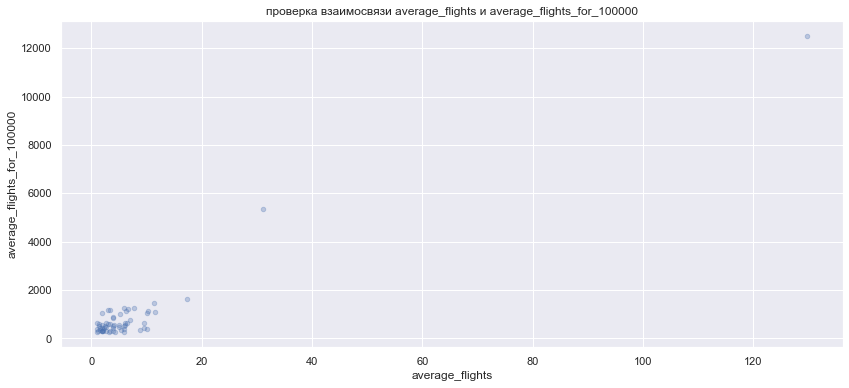

In [41]:
 from matplotlib.axes._axes import _log as matplotlib_axes_logger
 matplotlib_axes_logger.setLevel('ERROR') # уберем предупреждение

city_all_60.plot(x='average_flights', y='population_2018', kind='scatter', alpha=0.3, figsize=(14, 6))
plt.xlabel('average_flights')
plt.ylabel('average_flights_for_100000')
plt.title('проверка взаимосвязи average_flights и average_flights_for_100000');


In [42]:
print(city_all_60['average_flights'].corr(city_all_60['population_2018'])) # посчитаем коэффициент Пирсона

0.9685389874950987


Взаимосвязь между этими данными, населением города и средним количеством рейсов есть и корреляция положительная и довольно высока.

<a name="chapter_4."></a>
[к содержанию](#chapter_0)<br/>
<div class="p-3 mb-2 bg-primary text-white">
<b>4. Выводы.</b> <br/>
</div>

**4.1. Изучение данных из представленного файла данных**<br/>
4.1.1. В датасетах 8 и 101 строк. Пропущенных данных нет, данные массивов вполне корректные.<br/>
4.1.2. Типы данных тоже вполне нормальные object, int64 и float64. На такого размера таблицах нет смысла за уменьшение объема памяти.<br/><br/>
**4.2. Изучение данных конкретных столбцов и предобработка данных**<br/>
4.2.1. Перевели названия городов в строчные символы и обработали на случай лишних пробелов. <br/><br/>
**4.3. Исследовательский анализ данных.**<br/>
**4.3.1. Исследование данных по самолетам парку и количеству.<br/>**
4.3.1.1. Лидерами по количеству рейсов в сентябре 2018 года являются:<br/>
- Cessna 208 Caravan 	с количеством рейсов - 4557<br/>
- Bombardier CRJ-200 	с количеством рейсов - 4446<br/>
4.3.1.2. Сделана графическая гистограмма и круговая диграмма в %, показывающая зависимость количества рейсов от модели самолета.<br/>
Два самых маленьких самолета по вместимости пассажирских салонов Cessna 208 Caravan и Bombardier CRJ-200 - по количеству полетов владеют совокупной долей в количестве полетов в 47,6%.<br/>
Маленькие самолеты имеет гораздо большее количество полетов. Получается, что малая авиация до сих пор не умерла и работает по коротким маршрутам. Время полета там низкое, потому и количество рейсов большое. Интересно, насколько различается рентабельность полетов больших и малых самолетов. Но этих данных у нас нет.<br/>
Малые самолеты очень востребованы и во время отпусков, как подбрасывающие пассажиров, летящих в отпуск, до крупных городов с крупными аэропортами, являющимися транспротными узлами.<br/>
4.3.1.3. Добавлены из внешних источников дополнительные данные:<br/>
Лидер - Cessna 208 Caravan, довольно старый самолет, сертификация для полетов с 1984 года, до 13 мест. https://ru.wikipedia.org/wiki/Cessna_208<br/>
Bombardier CRJ-200, тоже старый самолет, сертификация с 1995 года, до 50 мест. https://ru.wikipedia.org/wiki/Bombardier_CRJ200<br/>
Sukhoi SuperJet-100 сертифицирован для эксплуатации с 2011 года, до 108 пассажиров. https://avia.pro/blog/superdzhet-100<br/>
Airbus A321-200, сертифицирован для эксплуатации с 1996 года, до 220 пассажиров. https://avia.pro/blog/airbus-a321-eyrbas-a321<br/>
Boeing 737-300, сертифицирован для эксплуатации с 1984 года, до 149 пассажиров.https://avia.pro/blog/boeing-737-300-foto-video-shema-salona-harakteristiki-otzyvy<br/>
Airbus A319-100, сертифицирован для эксплуатации с 1996 года, базовая модель до 124 пассажиров. https://avia.pro/blog/airbus-a319<br/>
Boeing 767-300, сертифицирован для эксплуатации с 1986 года, базовая модель до 269 пассажиров. https://avia.pro/blog/boeing-767-300<br/>
Boeing 777-300, сертифицирован для эксплуатации с 1998 года, базовая модель до 479 пассажиров. https://avia.pro/blog/boeing-777-300<br/>
Это позволило прикинуть пассажиропоток и посчитать сколько примерно пассажиров они бы подняли в воздух за сентябрь 2018 года при 100% загрузке.<br/>
4.3.1.4. Сделали еще один столбец ['aircraft_capacity'] на основе наших полученных новых данных о вместимости самолетов.<br/>
4.3.1.5. Интересно, что лидером по пассажиропотоку является самолет российского производства Sukhoi SuperJet-100 с примерной цифрой в 452 тыс. пассажиров за сентябрь 2018 года и это доля в 31,9% на рынке авиапассажироперевозок.<br/>
4.3.1.6. Сделана графическая гистограмма и круговая диграмма в %, показывающая зависимость пассажиропотока от модели самолета.<br/>
**4.3.2. Исследование городов по количеству рейсов.**<br/>
4.3.2.1. Выберали топ-10 городов по количеству рейсов, лидерами являются: <br/>
- москва  с количеством рейсов - 129.77<br/>
- санкт-петербург с количеством рейсов - 31.16<br/>
- новосибирск с количеством рейсов - 17.32<br/>

Высокая цифра Сочи привела к следующей задаче - стало интересно выяснить, Сочи попал в первую десятку в соответствии с населением, в нем проживающем, или как курортный город?<br/>
Решили это проверить, сравнив с населением данных городов. Заодно посмотрели, где расхождение с цифрами населения самое большое.<br/>
4.3.2.2. Сделана графическая гистограмма и круговая диграмма в %, показывающая зависимость среднего количества рейсов за день в августе 2018 года.<br/>
4.3.2.3. Дополнили нашу таблицу данными по населению российских городов из этого источника:<br/>
URL = 'https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8_%D1%81_%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC_%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5_100_%D1%82%D1%8B%D1%81%D1%8F%D1%87_%D0%B6%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%B9'<br/>
4.3.2.4. Взяли данные через requests.get(URL) и обработали эти данные. Привели их к корректному виду и типу данных. Эти данные в тыс.человек.<br/>
4.3.2.5. Соединили таблицы методом .merge<br/>
4.3.2.6. В этих данных не оказалось 24 городов. Выянено, что некоторые города из первоначального датасета не превышают численность населения в 100 тыс. чел. и данных на них не нашлось в этом источнике.<br/>
Например, город Советский в ХМАО является лидером среди малых городов по перевозкам. Думаю, что в нем вахтовые рабочие летают в основном.Город Советский в ХМАО является лидером среди малых городов по перевозкам. Думаю, что в нем вахтовые рабочие летают в основном.<br/>
Население — 29 452 чел. (2021), плотность населения города 77 чел/км²<br/>
Ближайшие города: Нижний Тагил (583 км), Екатеринбург (725 км), Ханты-Мансийск (367 км), Тюмень (1 039 км).<br/>
https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D0%B2%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_(%D0%A5%D0%B0%D0%BD%D1%82%D1%8B-%D0%9C%D0%B0%D0%BD%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%B2%D1%82%D0%BE%D0%BD%D0%BE%D0%BC%D0%BD%D1%8B%D0%B9_%D0%BE%D0%BA%D1%80%D1%83%D0%B3)<br/>
Следующие такие тоже подобные Мирный и Воркута.<br/>
Далее город-курорт Минеральные Воды.<br/>
И далее примерно такие же типы городов.<br/>
4.3.2.7. Также можно сказать, что такие крупные города, как Самара, Омск, Воронеж и Краснодар, например - имеют какие-то низкие показатели, что есть странно и может говорить о достоверности данных. А может иметь и более какую-то глубокую причину. Требует дальнейших исследований на датасетах более значимых размеров и иных периодов времени. <br/>
4.3.2.8. Посмотрим самые крупные по населению города и увидели, кто из городов лидер по количеству полетов на 100 тыс.жителей города.<br/>
Лидеры:<br/>
- брянск 	с средним количеством полетов на 100 тыс.жителей города - 2.46<br/>
- сургут с средним количеством полетов на 100 тыс.жителей города - 2.39<br/>
- сочи с средним количеством полетов на 100 тыс.жителей города - 2.27<br/>

Ну, если Сургут и Сочи я как-то могу объяснить, то первое место славного города Брянск поставило в недоумение. Хотя аэропорт в Брянске международный. https://ru.wikipedia.org/wiki/%D0%91%D1%80%D1%8F%D0%BD%D1%81%D0%BA<br/>
Ну а Москва в этом списке на почетном 17-ом месте.<br/>
4.3.2.9. Сделана проверка взаимосвязи данных по количеству полетов и по населению во всех крупных городах (по численности населения)average_flights и average_flights_for_100000 графически и по коэффициенту Пирсона, который оказался равен 0.9685389874950985. Это говорит о взаимосвязи между этими данными, населением города и средним количеством рейсов -  есть и положительная корреляция и она довольно высока.
